[Reference](https://medium.com/@usma.uva/shapwaterfall-visualizing-machine-learning-classification-model-probability-differences-between-5a294896c4db)

In [1]:
!pip install shapwaterfall==0.3.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 569 kB 40.0 MB/s 
  Created wheel for waterfallcharts: filename=waterfallcharts-3.8-py3-none-any.whl size=3413 sha256=67b70a800b61796646eedd193a10b86df980da3b3a02525d552e82e3839812b3
  Stored in directory: /root/.cache/pip/wheels/4a/b2/85/9b6eda27fab2effa580c6942fb094e8536cc46e8741ec5f586
Successfully built waterfallcharts


In [2]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier 
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import shap
import matplotlib.pyplot as plt
import waterfall_chart
from shapwaterfall import shapwaterfall

In [3]:
# load and organize Wisconsin Breast Cancer Data
data = load_breast_cancer()
label_names = data['target_names']
labels = data['target']
feature_names = data['feature_names']
features = data['data']

# data splits
X_tng, X_val, y_tng, y_val = train_test_split(features, labels, test_size=0.33, random_state=42)

In [4]:
print(X_tng.shape, X_val.shape)

(381, 30) (188, 30)


In [5]:
X_tng = pd.DataFrame(X_tng)
X_tng.columns = feature_names
X_val = pd.DataFrame(X_val)
X_val.columns = feature_names

In [6]:
# RFC model
rf_clf = RandomForestClassifier(n_estimators=1666, max_features="auto", min_samples_split=2, min_samples_leaf=2, max_depth=20, bootstrap=True, n_jobs=1)
clf = rf_clf.fit(X_tng, y_tng)
pred_rf = clf.predict_proba(X_val)
score_rf = roc_auc_score(y_val,pred_rf[:,1])
print(score_rf, 'Random Forest AUC')

0.9954360429258665 Random Forest AUC


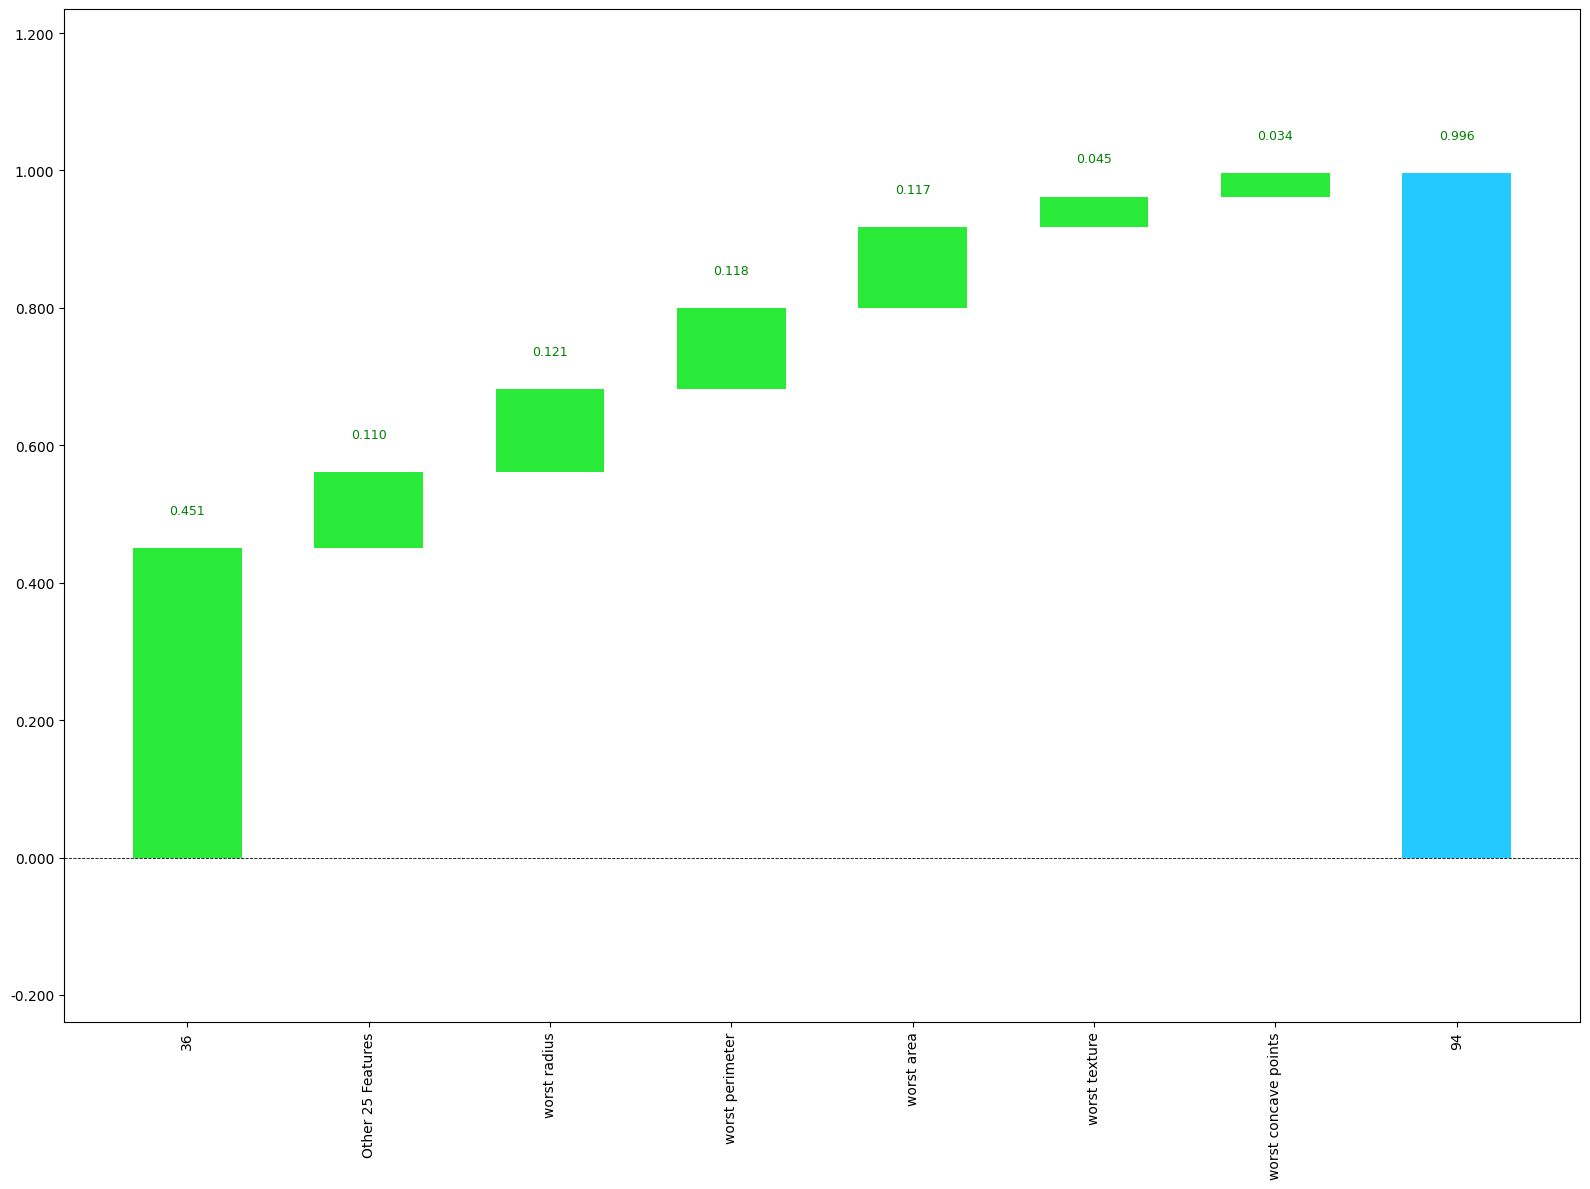

In [7]:
shapwaterfall(clf, X_tng, X_val, 36, 94, 5)

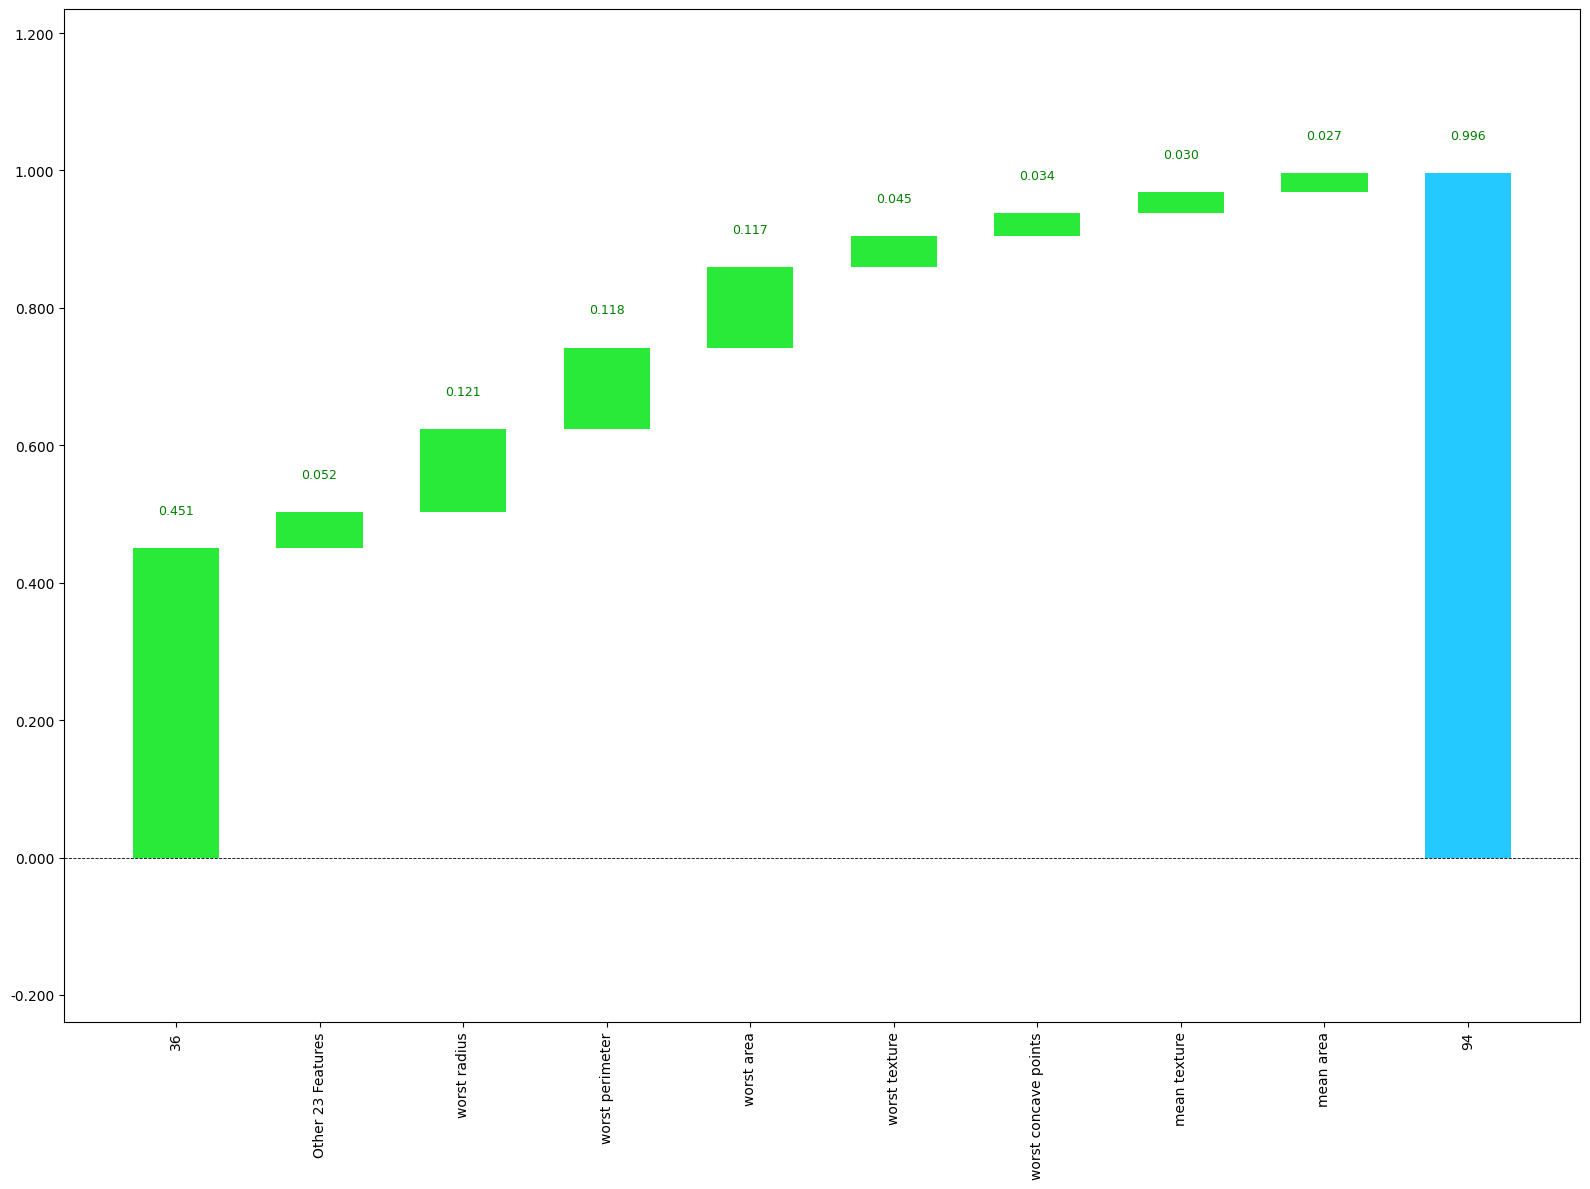

In [8]:
shapwaterfall(clf, X_tng, X_val, 94, 36, 7)

In [9]:
clf = LogisticRegression(solver='liblinear', random_state=0)
clf.fit(X_tng, y_tng)
y_pred = clf.predict(X_val)
confusion_matrix(y_val, y_pred)

array([[ 63,   4],
       [  4, 117]])

X does not have valid feature names, but LogisticRegression was fitted with feature names


  0%|          | 0/2 [00:00<?, ?it/s]

X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To repr

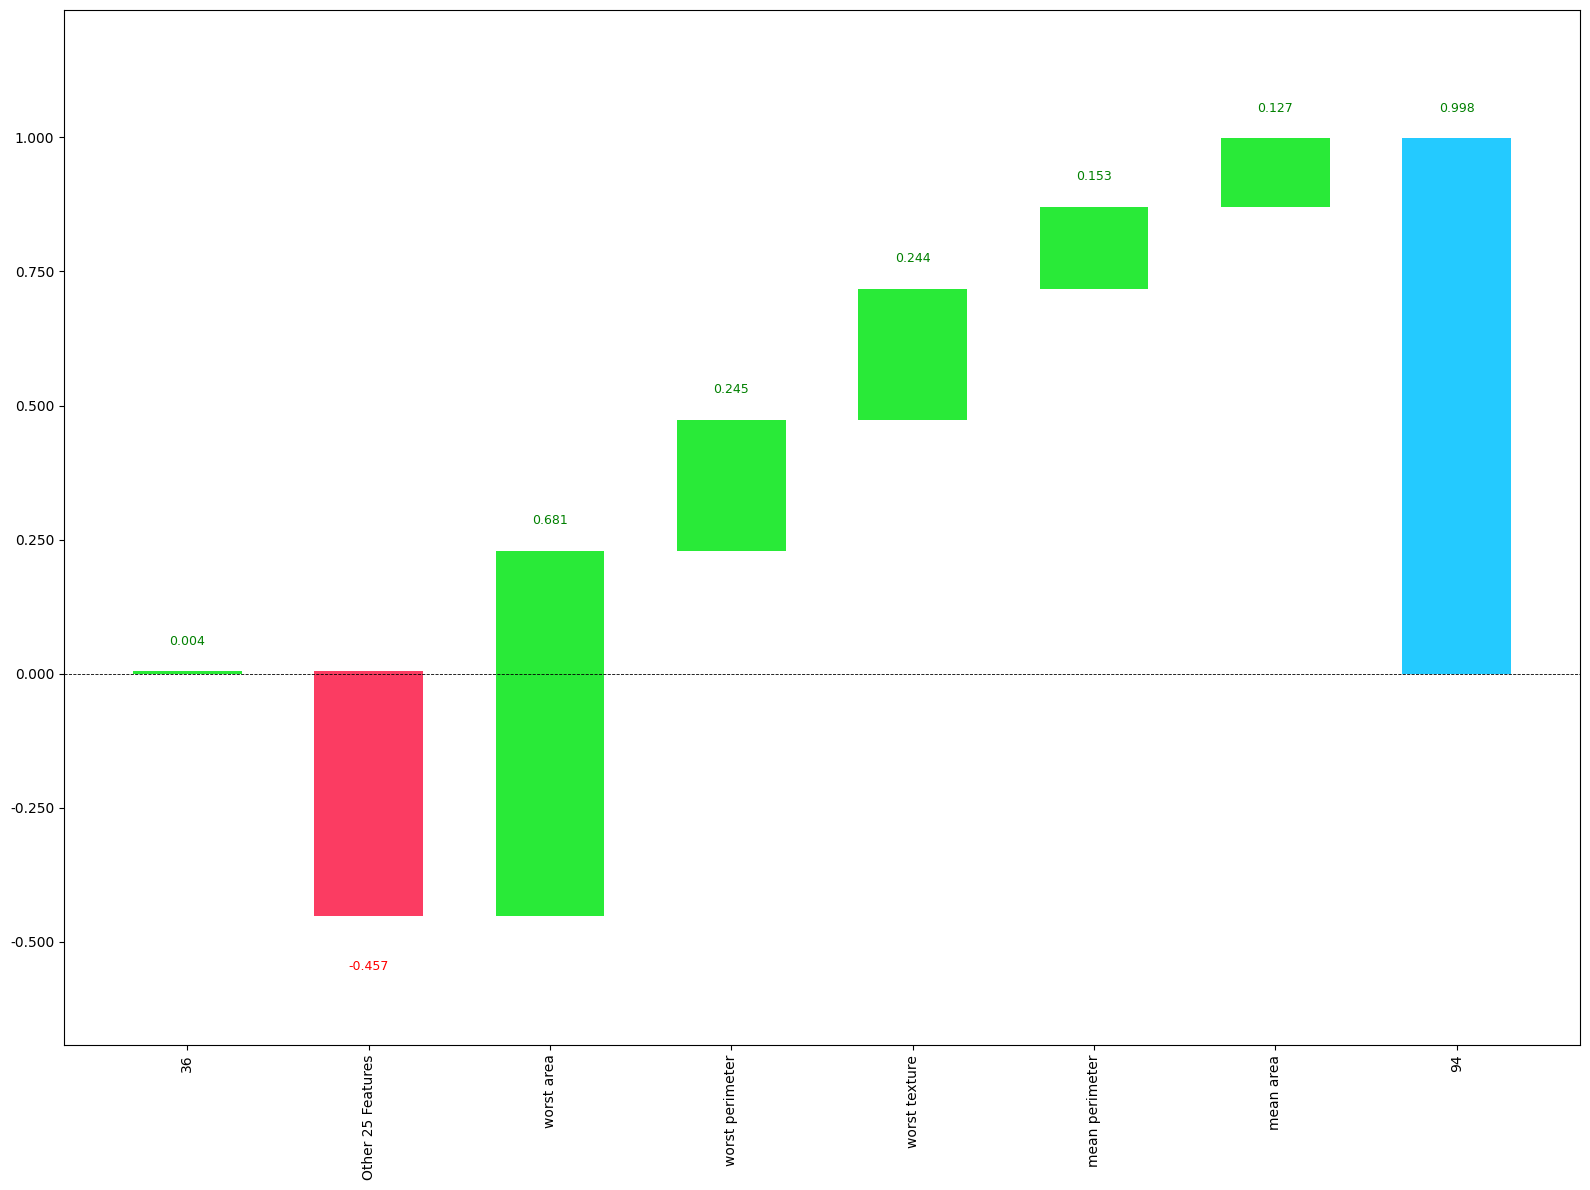

In [10]:
shapwaterfall(clf, X_tng, X_val, 36, 94, 5)

In [11]:
clf = SVC(probability=True)
clf.fit(X_tng, y_tng)
y_pred = clf.predict(X_val)
confusion_matrix(y_val, y_pred)

array([[ 59,   8],
       [  1, 120]])

X does not have valid feature names, but SVC was fitted with feature names


  0%|          | 0/2 [00:00<?, ?it/s]

X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:



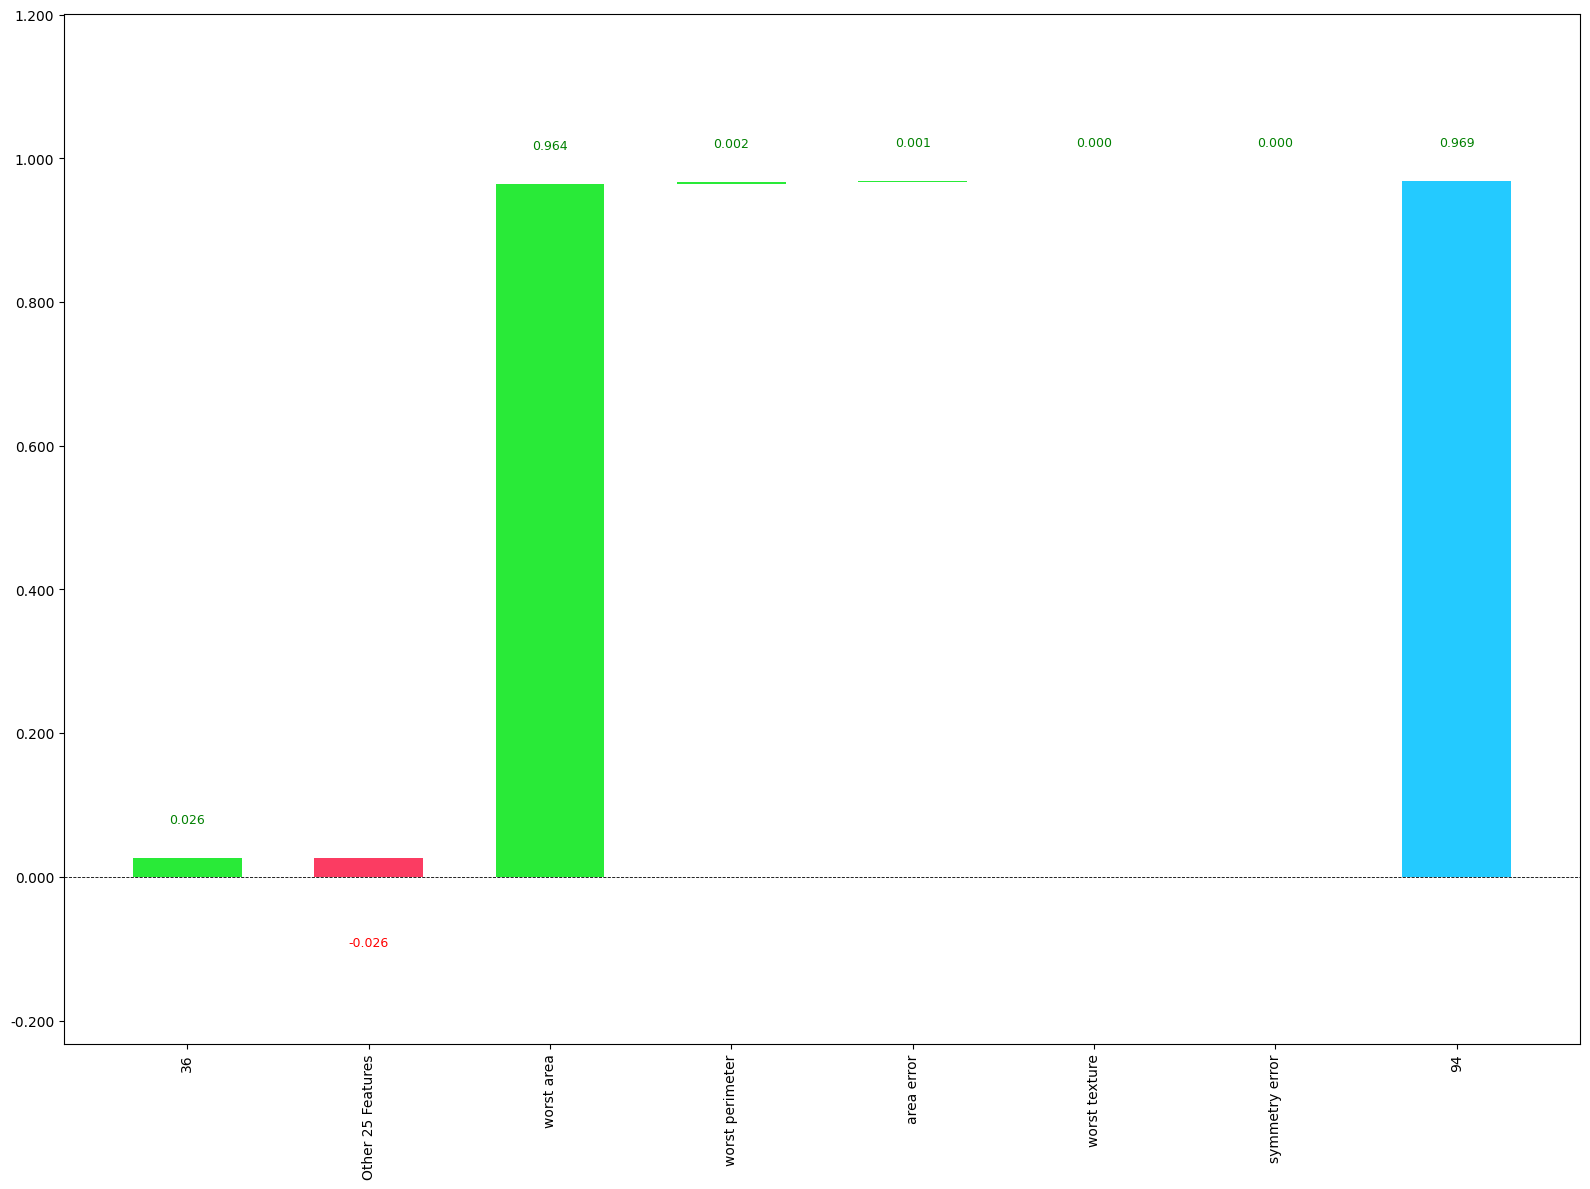

In [12]:
shapwaterfall(clf, X_tng, X_val, 36, 94, 5)